In [101]:
# !pip install --upgrade pip --user
# !pip install -r requirements --user

# Importação dos Dados

In [148]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, date, timedelta

In [235]:
X_train = pd.read_csv("Dados/final_Xtrain.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")

In [236]:
X_test = pd.read_csv("Dados/final_Xtest.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")

In [237]:
y_train = pd.read_csv("Dados/final_Ytrain.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")["total"]

In [238]:
y_test = pd.read_csv("Dados/final_Ytest.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")["total"]

In [239]:
X_train.tail()

isholiday  isnearholiday  isweekend    ma_total  TAVG  \
datehour                                                                     
2018-12-31 19:00:00      False           True      False  726.833333  42.0   
2018-12-31 20:00:00      False           True      False  683.733333  42.0   
2018-12-31 21:00:00      False           True      False  636.566667  42.0   
2018-12-31 22:00:00      False           True      False  594.433333  42.0   
2018-12-31 23:00:00      False           True      False  557.466667  42.0   

                     TMAX  TMIN  PRCP  SNOW  SNWD  ...  sin(360,freq=A-DEC)  \
datehour                                           ...                        
2018-12-31 19:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.961130   
2018-12-31 20:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.858764   
2018-12-31 21:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.699458   
2018-12-31 22:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.493776   
2018-12-31 23:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.255353   

                     cos(360,freq=A-DEC)  sin(361,freq=A-DEC)  \
datehour                                                        
2018-12-31 19:00:00             0.276097            -0.962114   
2018-12-31 20:00:00             0.512371            -0.860230   
2018-12-31 21:00:00             0.714673            -0.700995   
2018-12-31 22:00:00             0.869589            -0.495022   
2018-12-31 23:00:00             0.966848            -0.256047   

                     cos(361,freq=A-DEC)  sin(362,freq=A-DEC)  \
datehour                                                        
2018-12-31 19:00:00             0.272648            -0.963085   
2018-12-31 20:00:00             0.509905            -0.861690   
2018-12-31 21:00:00             0.713167            -0.702527   
2018-12-31 22:00:00             0.868880            -0.496268   
2018-12-31 23:00:00             0.966664            -0.256740   

                     cos(362,freq=A-DEC)  sin(363,freq=A-DEC)  \
datehour                                                        
2018-12-31 19:00:00             0.269196            -0.964045   
2018-12-31 20:00:00             0.507435            -0.863142   
2018-12-31 21:00:00             0.711657            -0.704057   
2018-12-31 22:00:00             0.868169            -0.497513   
2018-12-31 23:00:00             0.966481            -0.257433   

                     cos(363,freq=A-DEC)  sin(364,freq=A-DEC)  \
datehour                                                        
2018-12-31 19:00:00             0.265741            -0.964991   
2018-12-31 20:00:00             0.504961            -0.864587   
2018-12-31 21:00:00             0.710143            -0.705584   
2018-12-31 22:00:00             0.867456            -0.498757   
2018-12-31 23:00:00             0.966296            -0.258126   

                     cos(364,freq=A-DEC)  
datehour                                  
2018-12-31 19:00:00             0.262281  
2018-12-31 20:00:00             0.502483  
2018-12-31 21:00:00             0.708627  
2018-12-31 22:00:00             0.866742  
2018-12-31 23:00:00             0.966111  

[5 rows x 775 columns]

In [240]:
X_test.tail()

isholiday  isnearholiday  isweekend    ma_total  TAVG  \
datehour                                                                     
2019-12-31 19:00:00      False          False      False  846.200000  40.5   
2019-12-31 20:00:00      False          False      False  848.900000  40.5   
2019-12-31 21:00:00      False          False      False  847.200000  40.5   
2019-12-31 22:00:00      False          False      False  849.033333  40.5   
2019-12-31 23:00:00      False          False      False  837.600000  40.5   

                     TMAX  TMIN  PRCP  SNOW  SNWD  ...  sin(360,freq=A-DEC)  \
datehour                                           ...                        
2019-12-31 19:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.961130   
2019-12-31 20:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.858764   
2019-12-31 21:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.699458   
2019-12-31 22:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.493776   
2019-12-31 23:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.255353   

                     cos(360,freq=A-DEC)  sin(361,freq=A-DEC)  \
datehour                                                        
2019-12-31 19:00:00             0.276097            -0.962114   
2019-12-31 20:00:00             0.512371            -0.860230   
2019-12-31 21:00:00             0.714673            -0.700995   
2019-12-31 22:00:00             0.869589            -0.495022   
2019-12-31 23:00:00             0.966848            -0.256047   

                     cos(361,freq=A-DEC)  sin(362,freq=A-DEC)  \
datehour                                                        
2019-12-31 19:00:00             0.272648            -0.963085   
2019-12-31 20:00:00             0.509905            -0.861690   
2019-12-31 21:00:00             0.713167            -0.702527   
2019-12-31 22:00:00             0.868880            -0.496268   
2019-12-31 23:00:00             0.966664            -0.256740   

                     cos(362,freq=A-DEC)  sin(363,freq=A-DEC)  \
datehour                                                        
2019-12-31 19:00:00             0.269196            -0.964045   
2019-12-31 20:00:00             0.507435            -0.863142   
2019-12-31 21:00:00             0.711657            -0.704057   
2019-12-31 22:00:00             0.868169            -0.497513   
2019-12-31 23:00:00             0.966481            -0.257433   

                     cos(363,freq=A-DEC)  sin(364,freq=A-DEC)  \
datehour                                                        
2019-12-31 19:00:00             0.265741            -0.964991   
2019-12-31 20:00:00             0.504961            -0.864587   
2019-12-31 21:00:00             0.710143            -0.705584   
2019-12-31 22:00:00             0.867456            -0.498757   
2019-12-31 23:00:00             0.966296            -0.258126   

                     cos(364,freq=A-DEC)  
datehour                                  
2019-12-31 19:00:00             0.262281  
2019-12-31 20:00:00             0.502483  
2019-12-31 21:00:00             0.708627  
2019-12-31 22:00:00             0.866742  
2019-12-31 23:00:00             0.966111  

[5 rows x 775 columns]

In [241]:
y_train.tail()

datehour
2018-12-31 19:00:00    102.0
2018-12-31 20:00:00    133.0
2018-12-31 21:00:00     61.0
2018-12-31 22:00:00     73.0
2018-12-31 23:00:00     48.0
Freq: H, Name: total, dtype: float64

In [242]:
y_test.tail()

datehour
2019-12-31 19:00:00    782.0
2019-12-31 20:00:00    505.0
2019-12-31 21:00:00    386.0
2019-12-31 22:00:00    390.0
2019-12-31 23:00:00    291.0
Freq: H, Name: total, dtype: float64

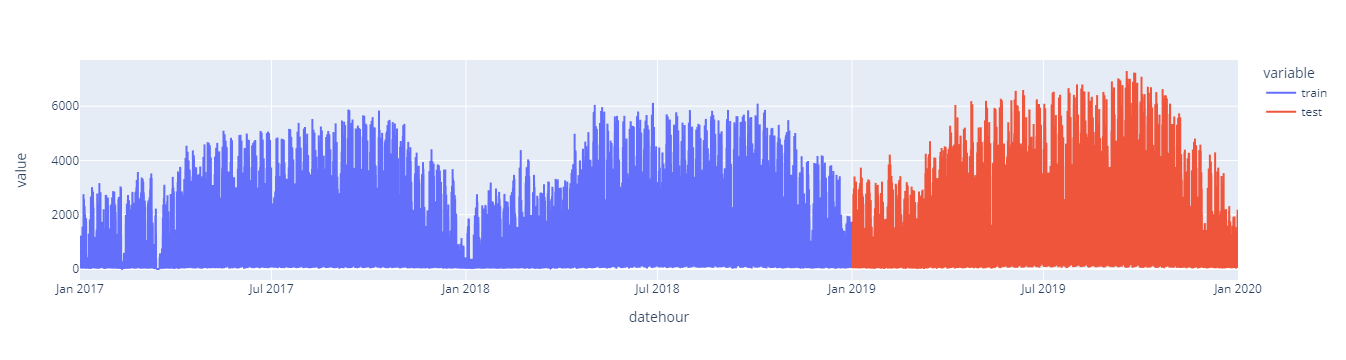

In [243]:
px.line(
    pd.DataFrame({
        "train": y_train,
        "test": y_test
    })
)

## Usar Apenas Dados Fourier

Interessante de ver como o moving average é importante para deixar de ser linear!

In [244]:
# X_train = X_train.iloc[:,10:]
# X_test = X_test.iloc[:,10:]

In [245]:
X_train.head() # primeira coluna deve ser const

isholiday  isnearholiday  isweekend  ma_total  TAVG  \
datehour                                                                   
2017-01-01 00:00:00      False           True       True     382.5  44.0   
2017-01-01 01:00:00      False           True       True     382.5  44.0   
2017-01-01 02:00:00      False           True       True     382.5  44.0   
2017-01-01 03:00:00      False           True       True     382.5  44.0   
2017-01-01 04:00:00      False           True       True     382.5  44.0   

                     TMAX  TMIN  PRCP  SNOW  SNWD  ...  sin(360,freq=A-DEC)  \
datehour                                           ...                        
2017-01-01 00:00:00  48.0  40.0   0.0   0.0   0.0  ...             0.000000   
2017-01-01 01:00:00  48.0  40.0   0.0   0.0   0.0  ...             0.255353   
2017-01-01 02:00:00  48.0  40.0   0.0   0.0   0.0  ...             0.493776   
2017-01-01 03:00:00  48.0  40.0   0.0   0.0   0.0  ...             0.699458   
2017-01-01 04:00:00  48.0  40.0   0.0   0.0   0.0  ...             0.858764   

                     cos(360,freq=A-DEC)  sin(361,freq=A-DEC)  \
datehour                                                        
2017-01-01 00:00:00             1.000000             0.000000   
2017-01-01 01:00:00             0.966848             0.256047   
2017-01-01 02:00:00             0.869589             0.495022   
2017-01-01 03:00:00             0.714673             0.700995   
2017-01-01 04:00:00             0.512371             0.860230   

                     cos(361,freq=A-DEC)  sin(362,freq=A-DEC)  \
datehour                                                        
2017-01-01 00:00:00             1.000000             0.000000   
2017-01-01 01:00:00             0.966664             0.256740   
2017-01-01 02:00:00             0.868880             0.496268   
2017-01-01 03:00:00             0.713167             0.702527   
2017-01-01 04:00:00             0.509905             0.861690   

                     cos(362,freq=A-DEC)  sin(363,freq=A-DEC)  \
datehour                                                        
2017-01-01 00:00:00             1.000000             0.000000   
2017-01-01 01:00:00             0.966481             0.257433   
2017-01-01 02:00:00             0.868169             0.497513   
2017-01-01 03:00:00             0.711657             0.704057   
2017-01-01 04:00:00             0.507435             0.863142   

                     cos(363,freq=A-DEC)  sin(364,freq=A-DEC)  \
datehour                                                        
2017-01-01 00:00:00             1.000000             0.000000   
2017-01-01 01:00:00             0.966296             0.258126   
2017-01-01 02:00:00             0.867456             0.498757   
2017-01-01 03:00:00             0.710143             0.705584   
2017-01-01 04:00:00             0.504961             0.864587   

                     cos(364,freq=A-DEC)  
datehour                                  
2017-01-01 00:00:00             1.000000  
2017-01-01 01:00:00             0.966111  
2017-01-01 02:00:00             0.866742  
2017-01-01 03:00:00             0.708627  
2017-01-01 04:00:00             0.502483  

[5 rows x 775 columns]

## Remover Alguma Frequência de Fourier

In [246]:
X_train = X_train.loc[:,~X_train.columns.str.contains("freq=A")]
X_test = X_test.loc[:,~X_test.columns.str.contains("freq=A")]

# Códigos

## Métricas

In [264]:
from sklearn import metrics
import math

def print_metrics(y_test, y_pred):
    df_diff = pd.Series(y_test - y_pred)
    mse = pd.Series(df_diff ** 2).replace(np.inf, np.nan).dropna().mean()
    rmse = math.sqrt(mse)
    mape = abs(df_diff/y_test).replace(np.inf, np.nan).dropna().mean()
    medianae = abs(df_diff).replace(np.inf, np.nan).dropna().median()
    meanae = abs(df_diff).replace(np.inf, np.nan).dropna().mean()

    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAPE:", mape)
    print("MedianAE:", medianae)
    print("MeanAE:", meanae)

# Random Forest Regressor

In [267]:
from sklearn.ensemble import RandomForestRegressor

In [268]:
modelo = RandomForestRegressor().fit(X_train, y_train)

In [269]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

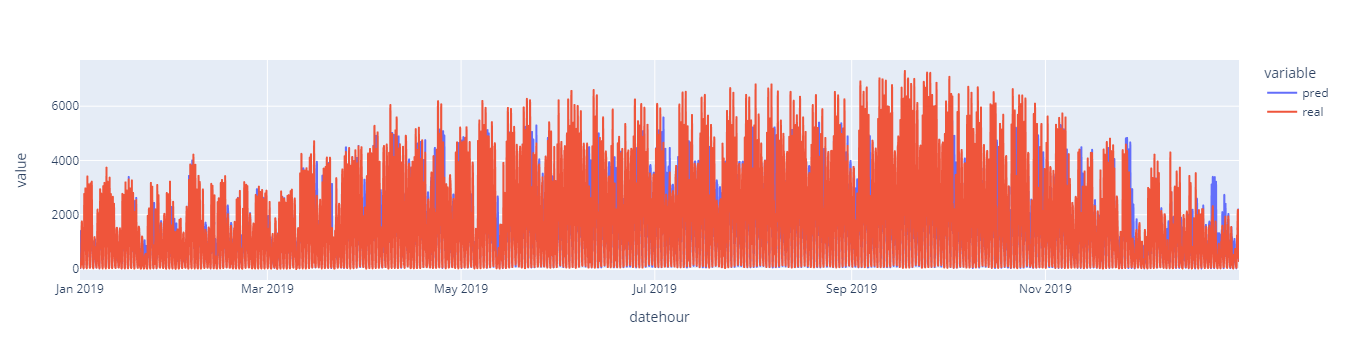

In [270]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [271]:
print_metrics(y_test, y_pred)

MSE: 234416.63879428085
RMSE: 484.16592072788524
MAPE: 0.280836493122315
MedianAE: 144.17000000000002
MeanAE: 287.79573858447486


# Linear Regression

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
modelo = LinearRegression(fit_intercept=False).fit(X_train, y_train)

In [274]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

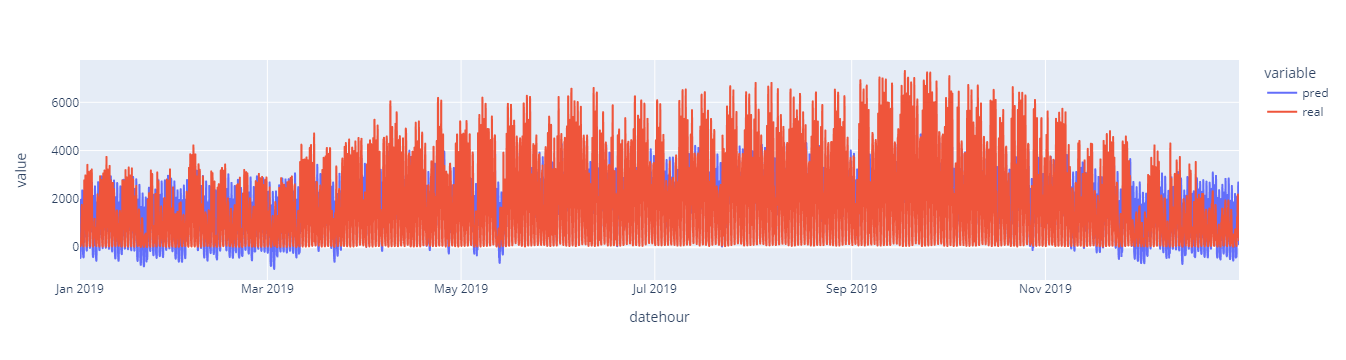

In [275]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [276]:
print_metrics(y_test, y_pred)

MSE: 591960.9993104585
RMSE: 769.3900176831374
MAPE: 1.662721144153205
MedianAE: 424.1270866084595
MeanAE: 571.5596474341075


# XGBoost

In [277]:
import xgboost as xgb

In [278]:
split_index = int(len(X_train) * 0.7)

X_train_2 = X_train[:split_index]
y_train_2 = y_train[:split_index]
X_val_2 = X_train[split_index:]
y_val_2 = y_train[split_index:]

In [279]:
modelo = xgb.XGBRegressor(n_estimators=50).fit(X_train_2, y_train_2, eval_set=[(X_val_2, y_val_2)], verbose=True)

[0]	validation_0-rmse:1560.66193
[1]	validation_0-rmse:1187.59449
[2]	validation_0-rmse:930.65545
[3]	validation_0-rmse:755.87446
[4]	validation_0-rmse:640.37724
[5]	validation_0-rmse:578.78482
[6]	validation_0-rmse:527.72962
[7]	validation_0-rmse:497.09530
[8]	validation_0-rmse:477.15676
[9]	validation_0-rmse:459.50469
[10]	validation_0-rmse:450.93754
[11]	validation_0-rmse:444.66244
[12]	validation_0-rmse:445.20707
[13]	validation_0-rmse:443.21761
[14]	validation_0-rmse:440.97161
[15]	validation_0-rmse:437.14988
[16]	validation_0-rmse:445.17270
[17]	validation_0-rmse:445.67165
[18]	validation_0-rmse:445.72007
[19]	validation_0-rmse:446.85554
[20]	validation_0-rmse:446.46685
[21]	validation_0-rmse:447.51440
[22]	validation_0-rmse:449.18983
[23]	validation_0-rmse:450.27147
[24]	validation_0-rmse:463.77132
[25]	validation_0-rmse:467.91901
[26]	validation_0-rmse:466.67622
[27]	validation_0-rmse:465.87089
[28]	validation_0-rmse:465.51121
[29]	validation_0-rmse:468.88659
[30]	validation_0-

In [280]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

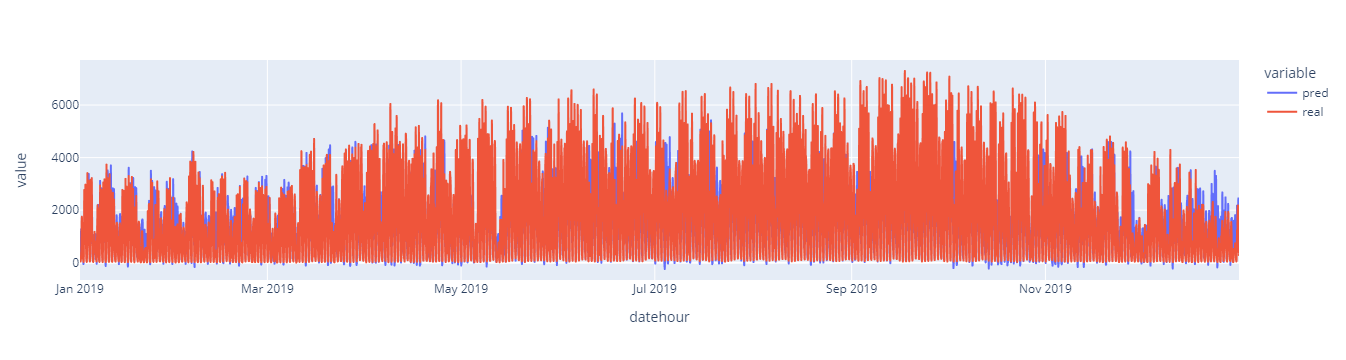

In [281]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [282]:
print_metrics(y_test, y_pred)

MSE: 350120.3381246965
RMSE: 591.7096738474845
MAPE: 0.8413762858463626
MedianAE: 260.8876647949219
MeanAE: 404.3920190385692


# LSTM

# Métricas